# CO2 Emissions Prediction Model
This project analyzes vehicle characteristics such as engine size, cylinder count, and fuel consumption to predict CO2 emissions.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


## Data Loading and Exploration

In [2]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Preparation

In [3]:
# Select features for CO2 emissions prediction
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


 ## Exploratory Data Analysis 

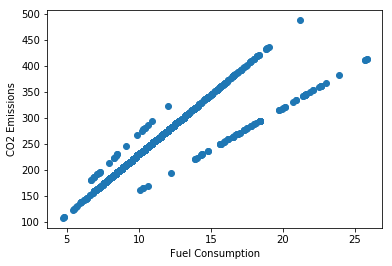

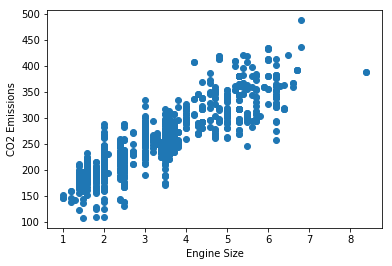

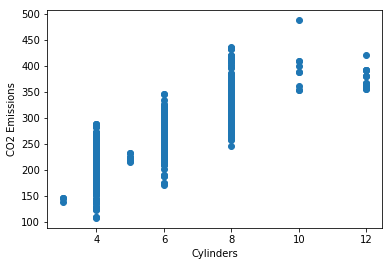

In [4]:

x1 = cdf.FUELCONSUMPTION_COMB
x2 = cdf.ENGINESIZE
x3 = cdf.CYLINDERS
y = cdf.CO2EMISSIONS

plt.scatter(x1, y)
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

plt.scatter(x2, y)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

plt.show()

plt.scatter(x3, y)
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')

plt.show()

## Data Split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Prepare features (X) and target (y)
X = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = cdf['CO2EMISSIONS']

# Split the data (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42  # Set seed for reproducibility
)

## Training the Model
We are using a multiple regression model.

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print("Coeffs:", regr.coef_)
print("intercept", regr.intercept_)

Coeffs: [11.2094395   7.15561381  9.5208118 ]
intercept 67.3483851836211


## Model Evaluation

In [7]:
from sklearn.metrics import  r2_score
y_test_hat = regr.predict(x_test)

# Calculate R² score
r2 = r2_score(y_test, y_test_hat)

# Calculate Mean Squared Error
mse = np.mean((y_test - y_test_hat) ** 2)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error
mae = np.mean(np.abs(y_test - y_test_hat))


print("MODEL PERFORMANCE METRICS:")
print(f"R² Score: {r2:.6f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")

MODEL PERFORMANCE METRICS:
R² Score: 0.875971
Mean Squared Error (MSE): 512.855137
Root Mean Squared Error (RMSE): 22.646305
Mean Absolute Error (MAE): 16.721594


# Results Interpretation:

R² Score of 0.8760: The model explains approximately 87.60% of the variance in GDPs.

Good model performance: R² > 0.8 indicates a very good predictive model


# Example:
Assume a vehicle with following features:
Engine Size = 4,
Number of Cylinders = 4,
Fuel Consumption = 8

In [8]:
while True:
    try:
        exmp_eng_size = float(input('Enter Engine Size: '))
        if 1<= exmp_eng_size <=8:
            break
        else:
            print('Engine Size must be between 1 and 8')
        
    except ValueError:
        print("Please enter a valid number (e.g., 5.5).")

while True:
    try:
        exmp_cyl = int(input('Enter number of cylinders: '))
        
        if 1<= exmp_eng_size <=12:
            
            break
        else:
            print('Engine Size must be between 1 and 12')

    except ValueError:
        print("Please enter a whole number (e.g., 2).")
        
while True:
    try:
        exmp_fuel_cons = float(input('Fuel Consumption: '))
        if 4 <= exmp_fuel_cons :
            break
        else:
            print("Fuel Consumption must be bigger than 4")
    except ValueError:
        print("Please enter a whole number (e.g., 12.5).")

# Prepare input
x_exmp = [[exmp_eng_size, exmp_cyl, exmp_fuel_cons]]


# Make prediction
y_exmp = regr.predict(x_exmp)

# Format output nicely
print(f'\nPrediction Results:')
print(f'Estimated Emission: {y_exmp[0]:,.2f}')

Enter Engine Size: 4
Enter number of cylinders: 4
Fuel Consumption: 8

Prediction Results:
Estimated Emission: 216.98


C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
